# Lightcone
##  Con y sin mini halos
### Le cambiamos el z max

###  Z max = 350
###  Z HEAT = 40

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as p21c

#import logging
#logger = logging.getLogger("21cmFAST")
#logger.setLevel(logging.INFO)

random_seed = 1993

EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap',\
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),\
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")
/tmp/ipykernel_31144/3602276642.py:16: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=EoR_colour)


This result was obtained using 21cmFAST at commit 2bb4807c7ef1a41649188a3efc462084f2e3b2e0

# Fiducial and lightcones

Let's fix the initial condition for this tutorial.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
# We change the default level of the logger so that
# we can see what's happening with caching.
import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools


In [3]:
if not os.path.exists('_cache'):
    os.mkdir('_cache')

p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

2024-10-15 11:44:57,066 | INFO | Removed 0 files from cache.


In [4]:
from py21cmfast import (
    AstroParams,
    CosmoParams,
    FlagOptions,
    UserParams,
    determine_halo_list,
    initial_conditions,
    perturb_field,
    global_params
)

from py21cmfast._utils import StructInstanceWrapper
from py21cmfast.c_21cmfast import ffi, lib
import numpy as np

# global_params

In [5]:
p21c.global_params.ALPHA_UVB = 5.0
p21c.global_params.CLUMPING_FACTOR = 2.0
p21c.global_params.CRIT_DENS_TRANSITION = 1.5
p21c.global_params.DELTA_CRIT_MODE = 1
p21c.global_params.DELTA_R_FACTOR = 1.100000023841858
p21c.global_params.DELTA_R_HII_FACTOR = 1.100000023841858
p21c.global_params.EVOLVE_DENSITY_LINEARLY = 0
p21c.global_params.FILTER = 0
p21c.global_params.FIND_BUBBLE_ALGORITHM = 2
p21c.global_params.HALO_FILTER = 0
p21c.global_params.HEAT_FILTER = 0
p21c.global_params.HII_FILTER = 1
p21c.global_params.HII_ROUND_ERR = 9.999999747378752e-06

p21c.global_params.INITIAL_REDSHIFT = 350.0

p21c.global_params.MAX_DVDR = 0.20000000298023224
p21c.global_params.MIN_DENSITY_LOW_LIMIT = 9.000000034120603e-08
p21c.global_params.M_MAX_INTEGRAL = 1.0000000272564224e+16
p21c.global_params.M_MIN_INTEGRAL = 100000.0
p21c.global_params.M_WDM = 2.0
p21c.global_params.NBINS_LF = 100
p21c.global_params.NUM_FILTER_STEPS_FOR_Ts = 40
p21c.global_params.NU_X_BAND_MAX = 2000.0
p21c.global_params.NU_X_MAX = 10000.0
p21c.global_params.N_POISSON = 5
p21c.global_params.OMk = 0.0
p21c.global_params.OMn = 0.0
p21c.global_params.OMr = 8.600000001024455e-05
p21c.global_params.OMtot = 1.0
p21c.global_params.OPTIMIZE = 0
p21c.global_params.OPTIMIZE_MIN_MASS = 99999997952.0
p21c.global_params.P_CUTOFF = 0
p21c.global_params.PhotonConsAsymptoteTo = 0.009999999776482582
p21c.global_params.PhotonConsEnd = 0.30000001192092896
p21c.global_params.PhotonConsEndCalibz = 3.5
p21c.global_params.PhotonConsStart = 0.9950000047683716
p21c.global_params.Pop = 2
p21c.global_params.Pop2_ion = 5000.0
p21c.global_params.Pop3_ion = 44021.0
p21c.global_params.R_BUBBLE_MIN = 0.6203504800796509
p21c.global_params.R_OVERLAP_FACTOR = 1.0
p21c.global_params.R_XLy_MAX = 500.0
p21c.global_params.R_smooth_density = 0.20000000298023224
p21c.global_params.RecombPhotonCons = 0
p21c.global_params.SHETH_b = 0.15000000596046448
p21c.global_params.SHETH_c = 0.05000000074505806
p21c.global_params.SMOOTH_EVOLVED_DENSITY_FIELD = 0
p21c.global_params.TK_at_Z_HEAT_MAX = -1.0
p21c.global_params.T_RE = 20000.0
p21c.global_params.T_USE_VELOCITIES = 1
p21c.global_params.USE_ADIABATIC_FLUCTUATIONS = True
p21c.global_params.USE_FAST_ATOMIC = False
p21c.global_params.VAVG = 25.860000610351562
p21c.global_params.XION_at_Z_HEAT_MAX = -1.0
p21c.global_params.Y_He = 0.24500000476837158
p21c.global_params.ZPRIME_STEP_FACTOR = 1.0199999809265137

p21c.global_params.Z_HEAT_MAX = 40.0

p21c.global_params.Zreion_HeII = 3.0
#p21c.global_params.external_table_path = "<cdata 'char[]' owning 83 bytes>"
p21c.global_params.g_x = 1.5
#p21c.global_params.wisdoms_path = "<cdata 'char[]' owning 37 bytes>"
p21c.global_params.wl = -1.0


In [6]:
output_dir = '_cache/mini-halos/'

BOX_LEN = 160
DIM = 128
HII_DIM = 64
#BOX_LEN = 150
#DIM = 256

# USE_FFTW_WISDOM make FFT faster
#user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "DIM": DIM, "USE_FFTW_WISDOM": True, }

user_params = {                
        "BOX_LEN": BOX_LEN,
        "DIM": DIM,
        "HII_DIM":HII_DIM,
        "NON_CUBIC_FACTOR": 1.0,
        "USE_FFTW_WISDOM": True,
        "HMF": 1,
        "USE_RELATIVE_VELOCITIES": True,
        "POWER_SPECTRUM": 5,
        "N_THREADS": 6,
        "PERTURB_ON_HIGH_RES": True,
        "NO_RNG": False,
        "USE_INTERPOLATION_TABLES": True,
        "FAST_FCOLL_TABLES": True,
        "USE_2LPT": True,
        "MINIMIZE_MEMORY": False,
        #"KEEP_3D_VELOCITIES": False,
    }        





initial_conditions = p21c.initial_conditions(user_params=user_params,random_seed=random_seed, direc=output_dir)

In [7]:
initial_conditions

InitialConditions(UserParams(BOX_LEN:160, DIM:128, FAST_FCOLL_TABLES:True, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:6, PERTURB_ON_HIGH_RES:True, POWER_SPECTRUM:5, USE_2LPT:True, USE_FFTW_WISDOM:True, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:True); CosmoParams(OMb:0.04897, OMm:0.3096, POWER_INDEX:0.9665, SIGMA_8:0.8102, hlittle:0.6766); GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;FILTER=0;HALO_FILTER=0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0.6203504800796509;R_OVERLAP_FACTOR=1.0;RecombPhotonCons=0;SHETH_b=0.15000000596046448;SHETH_c=0.0500000007

In [9]:
p21c.global_params

GlobalParams(ALPHA_UVB=5.0;CLUMPING_FACTOR=2.0;CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;DELTA_R_HII_FACTOR=1.100000023841858;EVOLVE_DENSITY_LINEARLY=0;FILTER=0;FIND_BUBBLE_ALGORITHM=2;HALO_FILTER=0;HEAT_FILTER=0;HII_FILTER=1;HII_ROUND_ERR=9.999999747378752e-06;INITIAL_REDSHIFT=350.0;MAX_DVDR=0.20000000298023224;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;NUM_FILTER_STEPS_FOR_Ts=40;NU_X_BAND_MAX=2000.0;NU_X_MAX=10000.0;N_POISSON=5;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;Pop=2;Pop2_ion=5000.0;Pop3_ion=44021.0;R_BUBBLE_MIN=0.6203504800796509;R_OVERLAP_FACTOR=1.0;R_XLy_MAX=500.0;R_smooth_density=0.20000000298023224;RecombPhotonCons=0;SHETH_b=0.15000000596046448;SHETH_c=0.05

Let's run a 'fiducial' model and see its lightcones

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWa

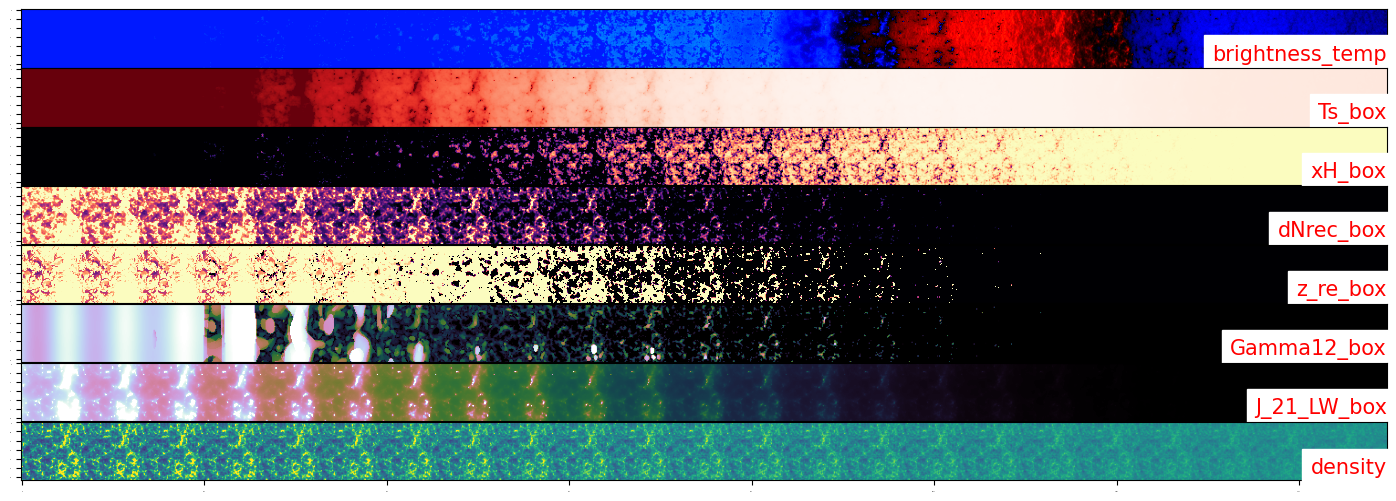

In [10]:
# the lightcones we want to plot later together with their color maps and min/max
lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
vmins = [-300, 1e1, 0, 0, 5, 0, 0, -1]
vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]

# set necessary flags for using minihalos and astro parameter
astro_params_fid = {'ALPHA_ESC': 0.0, 
                    'F_ESC10': -1.222, 
                    'F_ESC7_MINI': -1.5, # mini halo ( -2.5,-1.5)
                    'ALPHA_STAR': 0.5,
                    'F_STAR10': -1.25, 
                    'F_STAR7_MINI': -1.5,   #mini halo  por ejemplo, −1.75 o −2.0 menor efifiencia, y −1.25 o −1.5 mayor eficiencia
                    'L_X': 40.5, 
                    'L_X_MINI': 40.5,    # mini halo
                    'NU_X_THRESH': 500.0, 
                    'F_H2_SHIELD': 0.0}  # mini halo


flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS':True}


# lightcone

lightcone_fid = p21c.run_lightcone(
        redshift = 5.5,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_fid,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir
)

fig, axs = plt.subplots(len(lightcone_quantities),1,
            figsize=(getattr(lightcone_fid, lightcone_quantities[0]).shape[2]*0.01,
                     getattr(lightcone_fid, lightcone_quantities[0]).shape[1]*0.01*len(lightcone_quantities)))
for ii, lightcone_quantity in enumerate(lightcone_quantities):
    axs[ii].imshow(getattr(lightcone_fid, lightcone_quantity)[1],
                   vmin=vmins[ii], vmax=vmaxs[ii],cmap=cmaps[ii])
    axs[ii].text(1, 0.05, lightcone_quantity,horizontalalignment='right',verticalalignment='bottom',
            transform=axs[ii].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
    axs[ii].xaxis.set_tick_params(labelsize=0)
    axs[ii].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

plt.savefig('LC.jpg', dpi=300, bbox_inches='tight')

 # varying parameters

let's vary paremeters that describe mini-halos and see the impact to the global signal

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"
    
We also have a NOmini model where mini-halos are not included

In [11]:
#defining those color, linstyle, blabla
linestyles = ['-', '-',':','-.','-.',':']
colors     = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']
lws        = [1,3,2,2,2,2]

textss   = ['varying '+r'$f_{*,7}^{\rm mol}$',\
            'varying '+r'$f_{\rm esc}^{\rm mol}$',\
            'varying '+r'$L_{\rm x}^{\rm mol}$',\
            'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']
factorss = [[0, 1, 0.5, 1, 5, 10],] * len(textss)
labelss  = [['NOmini', 'reference', 'x0.5', 'x1', 'x5', 'x10'],] * len(textss)

Note that I've run these simulations in parallel before this tutorial. With these setup, each took ~6h to finish. Here, running means read the cached outputs.

## global properties

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_density
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: lowres_vy
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:815: UserWa

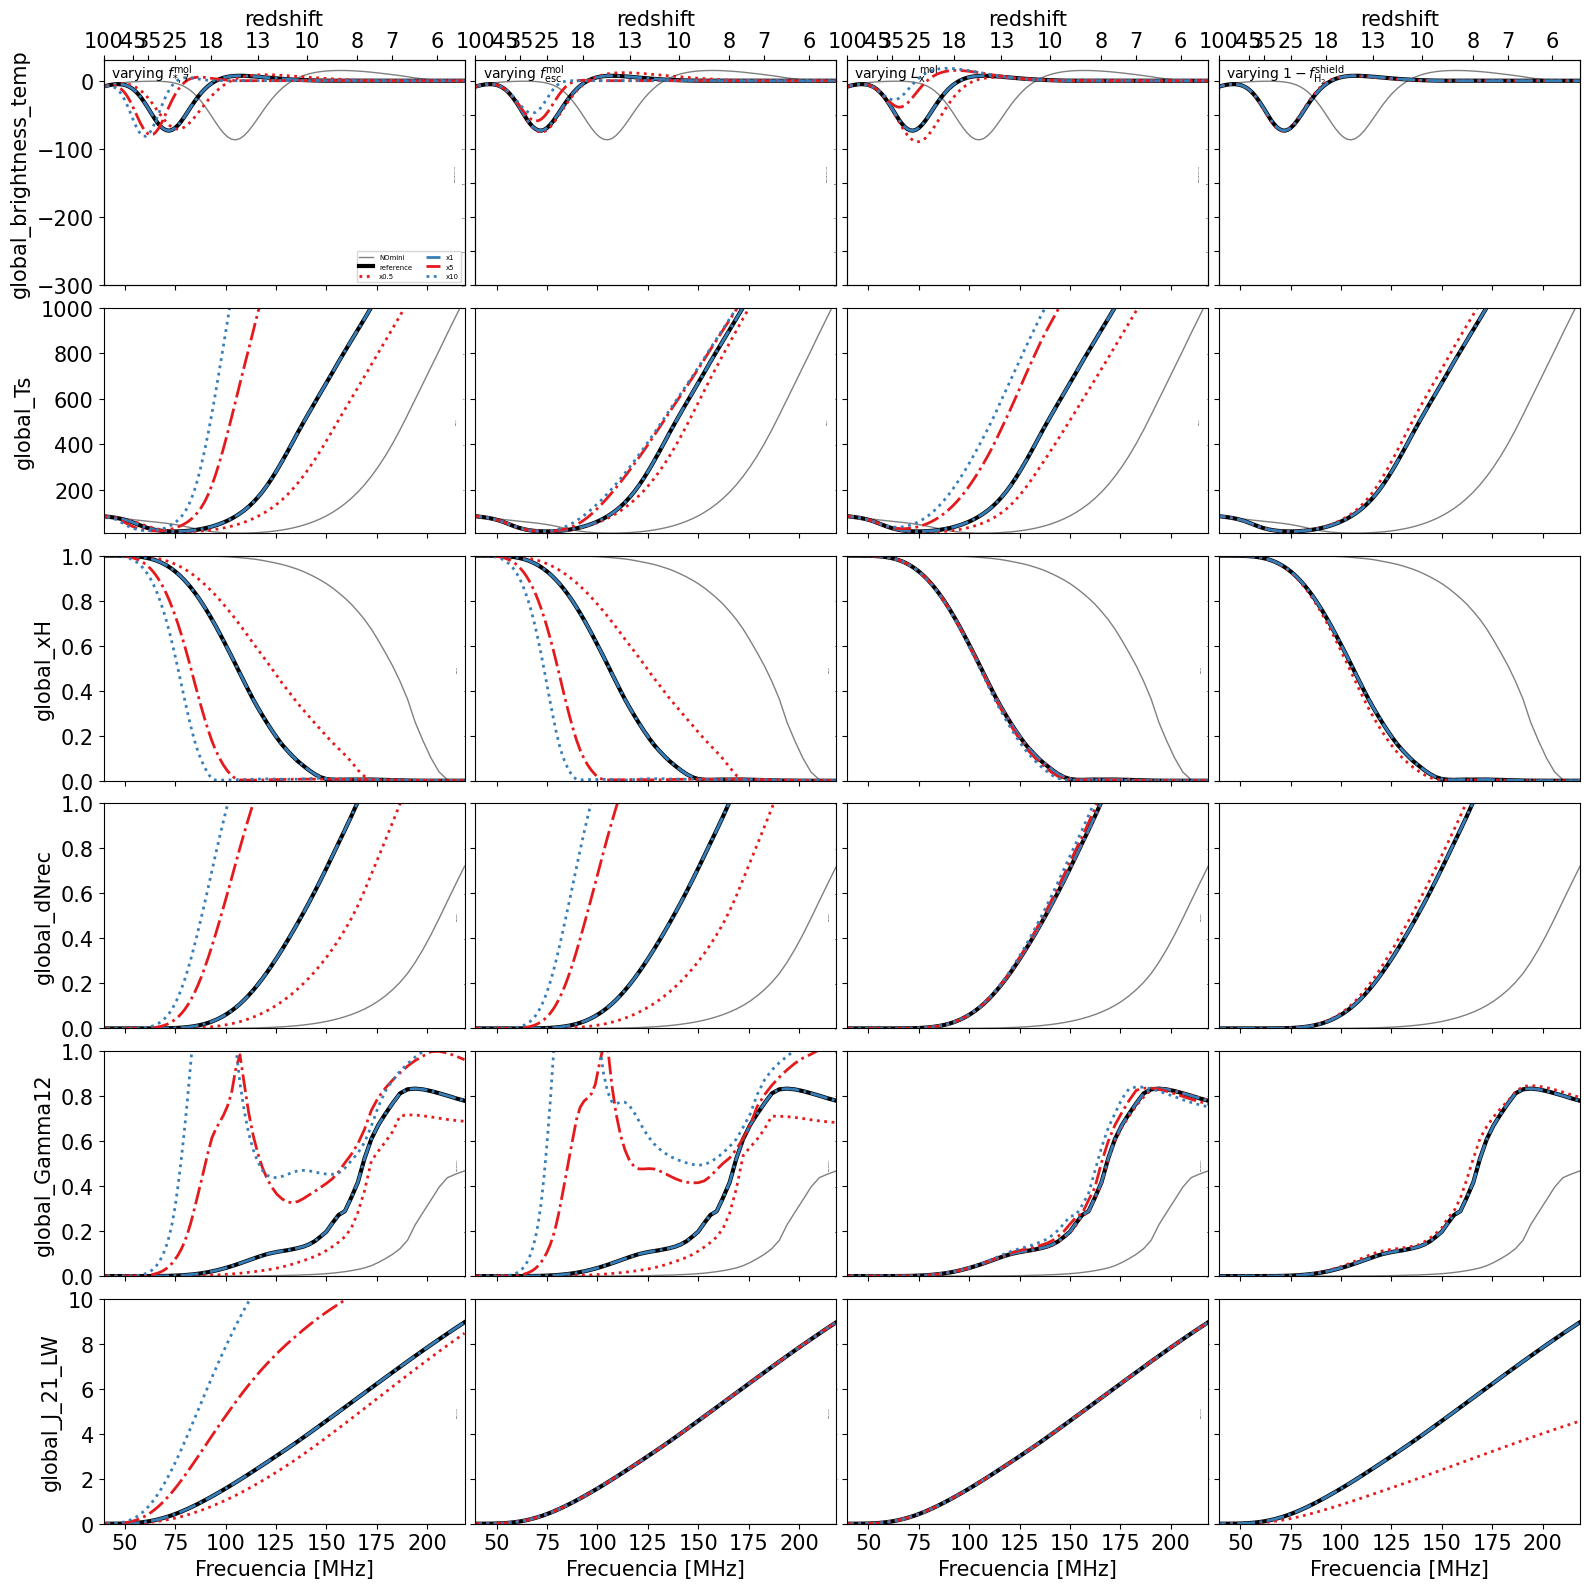

In [12]:
global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
#choose some to plot...
plot_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'Gamma12_box','J_21_LW_box')
ymins = [-300, 1e1, 0, 0, 0, 0]
ymaxs = [  30, 1e3, 1, 1, 1,10]

fig, axss = plt.subplots(len(plot_quantities), len(labelss),
                         sharex=True,  figsize=(4*len(labelss),2*len(global_quantities)))

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        flag_options = flag_options_fid.copy()
        astro_params = astro_params_fid.copy()
        factor = factors[kk]
        if label == 'NOmini':
            flag_options.update({'USE_MINI_HALOS': False})
        else:
            flag_options.update({'USE_MINI_HALOS': True})
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI']+np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI']+np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI']+np.log10(factor)})
            else:
                if factor > 1: continue # can't do negative F_H2_SHIELD
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
        if label == 'reference':
            lightcone = lightcone_fid
        else:
            lightcone = p21c.run_lightcone(
                redshift = 5.5,
                init_box = initial_conditions,
                flag_options = flag_options,
                astro_params = astro_params,
                global_quantities=global_quantities,
                random_seed = random_seed,
                direc = output_dir
            )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
                         color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            
    axs[0].text(0.02, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 10)
    for jj, global_quantity in enumerate(plot_quantities):
        axs[jj].set_ylim(ymins[jj], ymaxs[jj])
    axs[-1].set_xlabel('Frecuencia [MHz]',fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)

    axs[0].set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
    zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.)) 
    ax2.set_xticklabels([str(label) for label in zlabels])
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[0].legend(loc='lower right', ncol=2,fontsize=5,fancybox=True,frameon=True)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
            axs[jj].yaxis.set_tick_params(labelsize=15)
    else:
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=0)
            axs[jj].yaxis.set_tick_params(labelsize=0)

plt.tight_layout()


fig.subplots_adjust(hspace = 0.1,wspace=0.03)
plt.savefig('Parametros.jpg', dpi=300, bbox_inches='tight')

